# Predict cylinders based on other characteristics

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

%matplotlib inline

mtcars = pd.read_csv('mtcars.csv', index_col='model')
mtcars['cyl'] = mtcars.cyl.astype('category')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
scaler = StandardScaler()
scaler.fit(mtcars.drop('cyl', axis=1))
scaled_features = scaler.transform(mtcars.drop('cyl', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=mtcars.columns[:-1])
df_feat.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
0,0.153299,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,0.153299,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,0.456737,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
3,0.220730,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,-0.234427,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


In [3]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, mtcars['cyl'], test_size=0.30)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

pred

array([8, 8, 8, 4, 8, 8, 8, 4, 4, 8])

In [4]:
print(confusion_matrix(y_test, pred))

[[3 0]
 [0 7]]


In [5]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          4       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        10



In [6]:
error_rate = []

for i in range(1, 23):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

error_rate[0:2]

[0.0, 0.0]

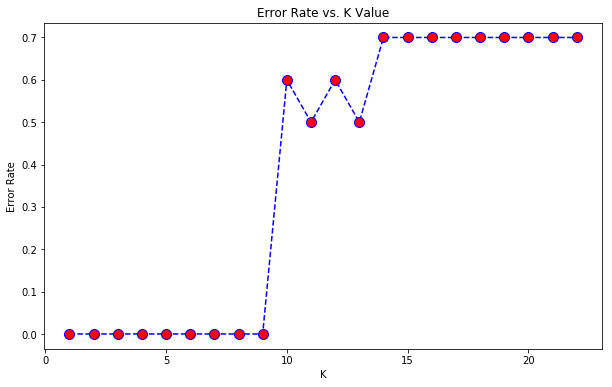

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 23), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')